## Assignment 2: Evaluating Regression Models
NOTE : PLEASE DO NOT POST THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References : 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This assignment focuses on the EDA process where you load, explore, visualize data and present your findings. 

Problem Statement : Advising a real estate brokerage firm to assess the market value of residential real estate.

Background Materials/Data :
This individual assignment involves fitting regression models with Python. You are asked to fit regression models to data from the Boston Housing Study. For your convenience, the data set (comma-delimited file boston.csv) and initial code for reading those data into Python are below.

Instructions:
- Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: 
   (1) the median value of homes in thousands of 1970 dollars or 
   (2) the log median value of homes in thousands of 1970 dollars. 
- Employ at least TWO regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
- Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.
- Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.



GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)


Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

AND (Audience:Business/C-Suite)
1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include 
    (1) Summary and problem definition for management; 
    (2) discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) overview of programming work along with model evlauation metrics; and 
    (4) review of results/ insightswith recommendations for management. (The paper must be an Adobe Acrobat pdf file)

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to updated all the cells based on best practices along with your analysis/findings.

Dataset

Variable         Name Description
-------------------------------------
neighborhood --> Name of the Boston neighborhood
                 (location of the census tract)
mv           --> Median value of homes in thousands of 1970 dollars
nox          --> Air pollution (nitrogen oxide concentration)
crim         --> Crime rate
zn           --> Percent of land zoned for lots
indus        --> Percent of business that is industrial or nonretail
chas         --> On the Charles River (1) or not (0)
rooms        --> Average number of rooms per home
age          --> Percentage of homes built before 1940
dis          --> Weighted distance to employment centers
rad          --> Accessibility to radial highways
tax          --> Tax rate
ptratio      --> Pupil/teacher ratio in public schools
lstat        --> Percentage of population of lower socio-economic status


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.


In [ ]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [3]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [4]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [5]:
# Although we standardize X and y variables on input, we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [9]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/02-Teaching/04-PML/03-Assignments/Assignments/2/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/02-Teaching/04-PML/03-Assignments/Assignments/2/"

/content/gdrive/My Drive/02-Teaching/04-PML/03-Assignments/Assignments/2
/content/gdrive/My Drive/02-Teaching/04-PML/03-Assignments/Assignments/2
Assignment2-GettingStarted.ipynb  data	Solution
Working Directory
/content/gdrive/My Drive/02-Teaching/04-PML/03-Assignments/Assignments/2


In [12]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv(work_dir+'./data/boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

In [13]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [14]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


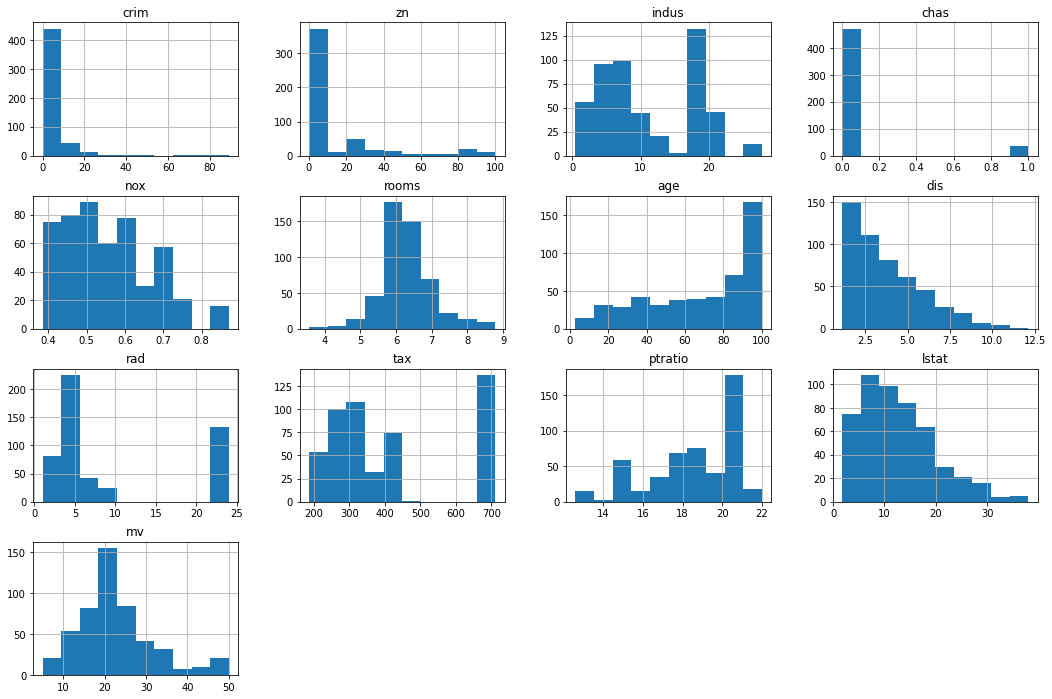

In [15]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

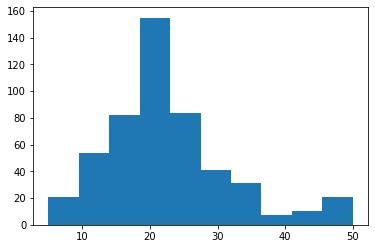

In [ ]:
# Single histogram of response variable : Median Value
plt.hist(boston['mv'])
plt.show('plot-histogram-boston-mv')

In [16]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

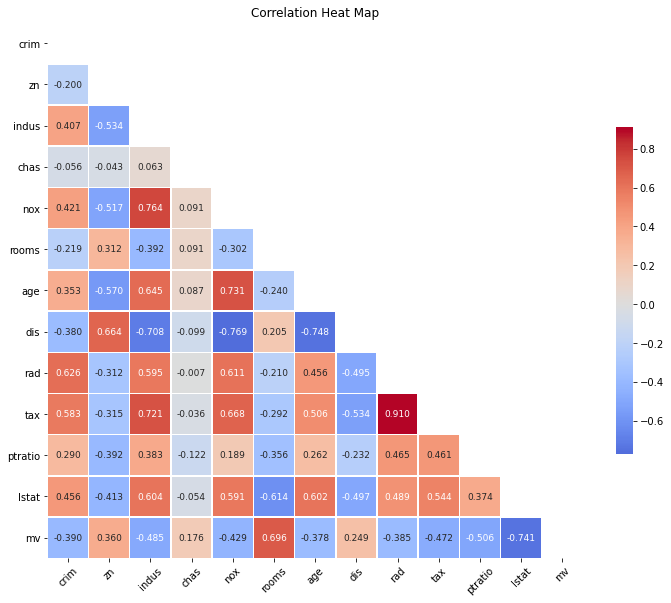

In [17]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

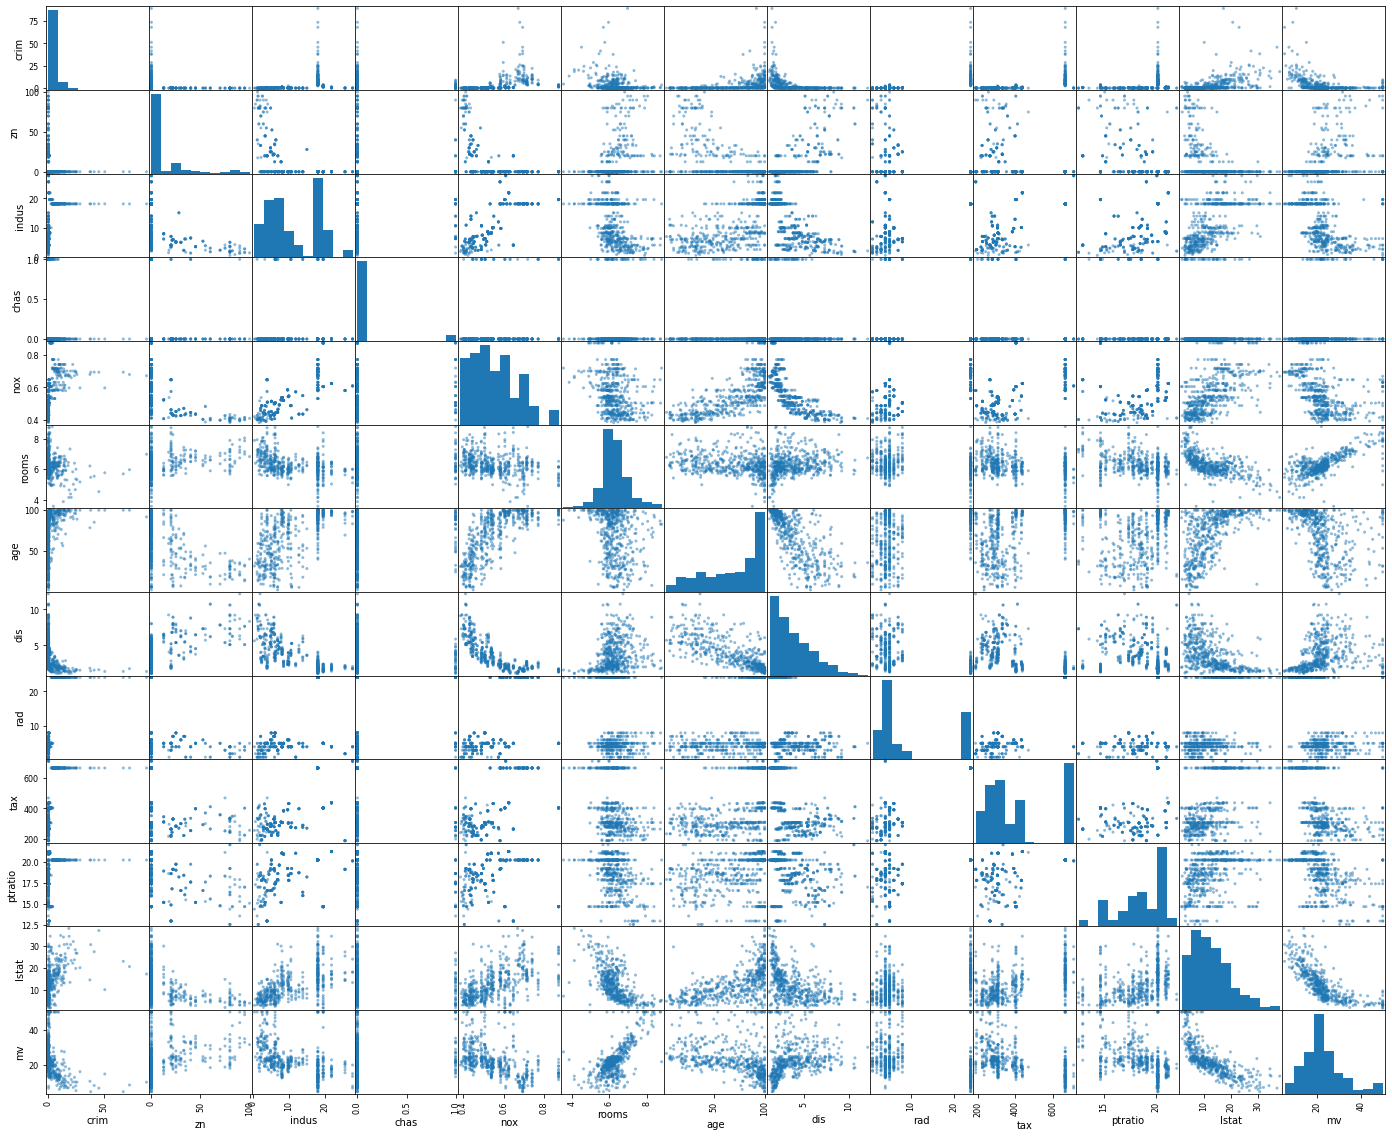

In [18]:
#Creare scatter plots of boston houisng data set. 
scatter_matrix(boston, figsize=(24, 20))
plt.show('Scatter Plot Matrix of boston data set')

In [19]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus  ...     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [22]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [23]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [24]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [25]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [26]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

In [ ]:
# Scale the data { Why ?}

# Split into train and validation prior to cross validation

# Set Train Test and Learn for folds

# Split Train and Test

In [ ]:
# list of regression model names


In [ ]:
# list of regressors ( Compare performance with and wo regularzation)


In [ ]:
# specify the k-fold cross-validation design for MV
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))


### Boston Housing Study: 
Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### REPORT/FINDINGS: 

(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.